<a href="https://colab.research.google.com/github/umang66782/Plaksha_Projects/blob/main/abc/MLab_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Lab 1

## Assignment 2 (Deadline : 22/10/2020 11:59PM)

Total Points : 50

### 1. Read the data into numpy array

In [ ]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".
import numpy as np
import pandas as pd 

data = pd.read_csv("data.csv")
data = data.reset_index(level=0)
data.columns=['a','b','y']




In [ ]:
data.head()

,a,b,y
0,51.87,79.72,1249.99
1,-30.66,-15.64,-516.61
2,-57.57,94.22,312.09
3,-122.10,5.15,-1544.90
4,-53.45,41.87,-201.57


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       3000 non-null   float64
 1   b       3000 non-null   float64
 2   y       3000 non-null   float64
dtypes: float64(3)
memory usage: 70.4 KB


In [ ]:
data.describe()

,a,b,y
count,3000.000000,3000.00000,3000.000000
mean,-18.483293,31.24422,-11.450140
std,34.398479,42.99015,662.873355
min,-140.710000,-132.18000,-2325.790000
25%,-40.392500,3.38250,-446.140000
50%,-18.485000,31.34500,-17.680000
75%,4.125000,60.59000,429.782500
max,93.930000,189.99000,2198.490000


### 2. Plot and Explore the data to get a better understanding

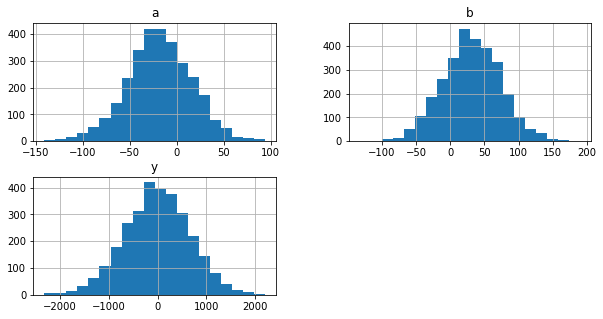

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins = 20 , figsize=(10,5))
plt.show()

In [ ]:
data.corr()

,a,b,y
a,1.000000,0.499028,0.890029
b,0.499028,1.000000,0.786392
y,0.890029,0.786392,1.000000


### 3. Prepare the data for modelling. (8 points)

In [ ]:
# Separate the data: input and output.

data_x = data[['a','b']]
data_y = data ['y']
data_x = np.asanyarray(data_x)
data_y = np.asanyarray(data_y)



In [ ]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
# For your reference: you can use "train_test_split" from sklearn twice to perform this. 
# From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?

from sklearn.model_selection import train_test_split
train_x ,test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, shuffle=True ,random_state=42)
train_x ,val_x , train_y, val_y = train_test_split(train_x, train_y, test_size=0.25,shuffle=True, random_state=42)

#### No, Stratified sampling is not necessary because stratified sampling is involves the random selection of data from an entire data, so each possible sample is equally likely to occur. But from histograph of input, output, we can see the sample of data are equally distributed as normally. So, no need to use stratified sampling,

### 4. Modelling

#### 4.1. Linear Regression (8 points)

In [ ]:
# Implement Linear Regression.
# Use both train and val data for training purpose.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import LinearRegression
train_x_val = np.concatenate((train_x, val_x), axis=0)
train_y_val = np.concatenate((train_y, val_y), axis=0)
lin_reg = LinearRegression().fit(train_x_val,train_y_val)
prdt_train_y = lin_reg.predict(train_x_val)
prdt_test_y = lin_reg.predict(test_x)
lin_reg.score(train_x, train_y)

0.948116725328535

#### 4.2. Ridge Regression (8 points)

In [ ]:
# Implement Ridge Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
import numpy as np
from sklearn.linear_model import RidgeCV, Ridge

ridge_reg = RidgeCV(alphas = np.linspace(0.5,500,1000))
ridge_reg.fit(train_x_val, train_y_val)
alpha = ridge_reg.alpha_
print(alpha)

ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(train_x_val, train_y_val)
prdt_train_val_y = ridge_reg.predict(train_x_val)
prdt_test_y = ridge_reg.predict(test_x)
ridge_reg.score(train_x, train_y)




345.0


0.948116579481558

#### 4.3. Lasso Regression (8 points)

In [ ]:
# Implement Lasso Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.

import numpy as np
from sklearn.linear_model import Lasso, LassoCV
#alphas = np.arange(0.5,500,0.01)
Lasso_reg = LassoCV(alphas = np.linspace(0.1,250,1000))
Lasso_reg.fit(train_x_val,train_y_val)
alpha = Lasso_reg.alpha_
print(alpha)
Lasso_reg = Lasso(alpha=alpha)
Lasso_reg.fit(train_x_val,train_y_val)
prdt_train_val_y = Lasso_reg.predict(train_x_val)
prdt_test_y = Lasso_reg.predict(test_x)
Lasso_reg.score(train_x, train_y)





0.1


0.9481167155716546

#### 4.4. ElasticNet Regression (8 points)

In [ ]:
# Implement ElasticNet Regression.
# Perform cross validation to find a good value for your hyper-parameters.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.


import numpy as np
from sklearn.linear_model import ElasticNet,ElasticNetCV
ElasticNet_reg = ElasticNetCV(alphas = np.linspace(0.5,250,1000))
ElasticNet_reg.fit(train_x_val,train_y_val)
alpha = ElasticNet_reg.alpha_
print(alpha)
ElasticNet_reg = Lasso(alpha=alpha)
ElasticNet_reg.fit(train_x_val,train_y_val)
prdt_train_val_y = ElasticNet_reg.predict(train_x_val)
prdt_test_y = ElasticNet_reg.predict(test_x)
ElasticNet_reg.score(train_x, train_y)


0.5


0.9481166744740084

### 5. Analysis (8 points)

In [ ]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.


## Linear Regression 

In [ ]:
prdt_test_y = lin_reg.predict(test_x[0:10])
print(test_y[0:10],'\n',prdt_test_y,'\n')

[  66.12 -572.89  -94.71 -306.84  580.1   -34.05  -81.37  552.6   -24.39
  538.47] 
 [  61.23562991 -576.47400223 -112.4892831  -413.46017031  602.52161228
  -19.80815241 -172.96819682  601.27825731  -42.40641735  558.28390456] 



In [ ]:
prdt_train_y_val = lin_reg.predict(train_x_val)
rmse_linreg = np.sqrt(mean_squared_error(prdt_train_y_val, train_y_val))
mae_linreg = mean_absolute_error(prdt_train_y_val, train_y_val)

prdt_test_y = lin_reg.predict(test_x)
rmse_linregr_1 = np.sqrt(mean_squared_error(prdt_test_y, test_y))
mae_linregr_1 = mean_absolute_error(prdt_test_y, test_y)

print("RMSE(train+val) = ",rmse_linreg,'\n' )
print("MAE(train+val) = ",mae_linreg,'\n' )
print("RMSE(test) = ",rmse_linregr_1,'\n' )
print("MAE (test) = ",mae_linregr_1,'\n' )

RMSE(train+val) =  151.58756422068186 

MAE(train+val) =  120.77989321708048 

RMSE(test) =  148.47388000962516 

MAE (test) =  118.72866511674283 



## Ridge Regression

In [ ]:
prdt_test_y = ridge_reg.predict(test_x[0:10])
print(test_y[0:10],'\n',prdt_test_y,'\n')

[  66.12 -572.89  -94.71 -306.84  580.1   -34.05  -81.37  552.6   -24.39
  538.47] 
 [[-16.89979208  38.70934766]
 [-19.19508113 -47.19186941]
 [-16.78144462  13.97192837]
 [-47.56548554  26.79856227]
 [ 34.2606874   23.19433839]
 [-27.85742784  46.95776645]
 [-38.07594603  43.69743104]
 [ 19.98473992  48.67074629]
 [  2.81363008 -11.34414511]
 [  7.44790829  65.12820704]] 



In [ ]:
prdt_train_y_val = ridge_reg.predict(train_x_val)
rmse_ridge_reg = np.sqrt(mean_squared_error(prdt_train_y_val, train_y_val))
mae_ridge_reg = mean_absolute_error(prdt_train_y_val, train_y_val)

prdt_test_y = ridge_reg.predict(test_x)
rmse_ridge_reg_1 = np.sqrt(mean_squared_error(prdt_test_y, test_y))
mae_ridge_reg_1 = mean_absolute_error(prdt_test_y, test_y)

print("RMSE(train+val) = ",rmse_ridge_reg,'\n' )
print("MAE(train+val) = ",mae_ridge_reg,'\n' )
print("RMSE(test) = ",rmse_ridge_reg_1,'\n' )
print("MAE (test) = ",mae_ridge_reg_1,'\n' )

RMSE(train+val) =  151.58757380353052 

MAE(train+val) =  120.78073780395916 

RMSE(test) =  148.47458176880644 

MAE (test) =  118.73033117359688 



## Lasso Regression 

In [ ]:
prdt_test_y = Lasso_reg.predict(test_x[0:10])
print(test_y[0:10],'\n',prdt_test_y,'\n')

[  66.12 -572.89  -94.71 -306.84  580.1   -34.05  -81.37  552.6   -24.39
  538.47] 
 [  61.23522843 -576.46962545 -112.48830537 -413.46003354  602.52228506
  -19.80905848 -172.96896303  601.27745171  -42.40394838  558.28213036] 



In [ ]:
prdt_train_y_val = Lasso_reg.predict(train_x_val)
rmse_Lasso_reg = np.sqrt(mean_squared_error(prdt_train_y_val, train_y_val))
mae_Lasso_reg = mean_absolute_error(prdt_train_y_val, train_y_val)

prdt_test_y = Lasso_reg.predict(test_x)
rmse_Lasso_reg_1 = np.sqrt(mean_squared_error(prdt_test_y, test_y))
mae_Lasso_reg_1 = mean_absolute_error(prdt_test_y, test_y)

print("RMSE(train+val) = ",rmse_Lasso_reg,'\n' )
print("MAE(train+val) = ",mae_Lasso_reg,'\n' )
print("RMSE(test) = ",rmse_Lasso_reg_1,'\n' )
print("MAE (test) = ",mae_Lasso_reg_1,'\n' )

RMSE(train+val) =  151.58756423857486 

MAE(train+val) =  120.77991457043026 

RMSE(test) =  148.47374032516424 

MAE (test) =  118.72849886815231 



## ElasticNet Regression

In [ ]:
prdt_test_y = ElasticNet_reg.predict(test_x[0:10])
print(test_y[0:10],'\n',prdt_test_y,'\n')

[  66.12 -572.89  -94.71 -306.84  580.1   -34.05  -81.37  552.6   -24.39
  538.47] 
 [  61.23371814 -576.45445456 -112.48505863 -413.45741094  602.52069468
  -19.81150019 -172.97016403  601.27181101  -42.39700119  558.27407199] 



In [ ]:
prdt_train_y_val = ElasticNet_reg.predict(train_x_val)
rmse_ElasticNet_reg = np.sqrt(mean_squared_error(prdt_train_y_val, train_y_val))
mae_ElasticNet_reg = mean_absolute_error(prdt_train_y_val, train_y_val)

prdt_test_y = ElasticNet_reg.predict(test_x)
rmse_ElasticNet_reg_1 = np.sqrt(mean_squared_error(prdt_test_y, test_y))
mae_ElasticNet_reg_1 = mean_absolute_error(prdt_test_y, test_y)

print("RMSE(train+val) = ",rmse_ElasticNet_reg,'\n' )
print("MAE(train+val) = ",mae_ElasticNet_reg,'\n' )
print("RMSE(test) = ",rmse_ElasticNet_reg_1,'\n' )
print("MAE (test) = ",mae_ElasticNet_reg_1,'\n' )

RMSE(train+val) =  151.5875646757279 

MAE(train+val) =  120.78002835654857 

RMSE(test) =  148.4732775762452 

MAE (test) =  118.7279858374883 



### 6. Final Observations (2 points)

In [ ]:
# Write down your final conclusions/observations.

1. For linear, Ridge,Lasso, ElasticNet Square, MAE(train+val),MAE(test), RMSE(train+val),RMSE(test) is aproxmiately equal which means every model perform equal with same error.

2. Regularlization model(Ridge,Lasso, ElasticNet) are showing eaqual error. So, no need to used these model, we can use linear regression for this data.

3. As correlation between both input to output is approxmiatley same , So we can use linear modeling for this data. 